# Client

In [67]:
!pip install -U jina docarray matplotlib  ipywidgets==8.0.0rc0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.5/627.5 KB 4.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... done
  Created wheel for docarray: filename=docarray-0.13.12-py3-none-any.whl size=672615 sha256=a755dba12381092c123b626c0ffdd7af06583349d95010c3e0d62c0b6533740a
  Stored in directory: /home/sami/snap/alacritty/common/.cache/pip/wheels/e9/05/81/e607d2072f4246e0ae4783da757e9f1fc3f5ff0fa5fa6c1799
Successfully built docarray
  Attempting uninstall: docarray
    Found existing installation: docarray 0.13.11
    Uninstalling docarray-0.13.11:
      Successfully uninstalled docarray-0.13.11
You should consider upgrading via the '/home/sami/Documents/workspace/demo/monitoring/venv/bin/python -m pip install --upgrade pip' command.


In [1]:
from jina import Client
from docarray import DocumentArray, Document

import requests

In [2]:
import jina
jina.__version__

'3.4.2'

## data

In [3]:
da = DocumentArray.pull('demo-leftda', show_progress=True)

Output()

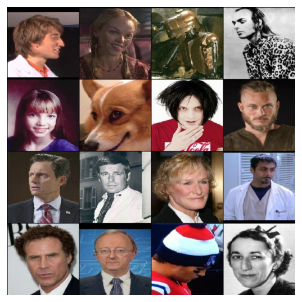

In [4]:
da[0:16].plot_image_sprites()

## Requesting the Flow

In [5]:
client = Client(host='localhost:53000')

In [6]:
%%time
client.index(inputs=da[0:100])

CPU times: user 20.4 ms, sys: 14.2 ms, total: 34.7 ms
Wall time: 7.39 s


╭──────────────────────── Documents Summary ─────────────────────────╮
│                                                                    │
│   Length                 100                                       │
│   Homogenous Documents   True                                      │
│   Common Attributes      ('id', 'mime_type', 'uri', 'embedding')   │
│   Multimodal dataclass   False                                     │
│                                                                    │
╰────────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)   100              False             │
│   id          ('str',)       100              False             │
│   mime_type   ('str',)       1                False             │
│   uri         ('str',)       100              False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [7]:
doc = client.search(inputs=Document(text='a dog'))

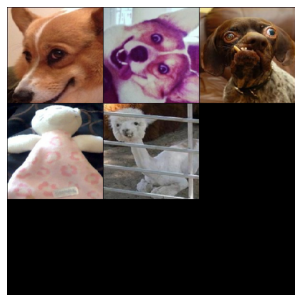

In [8]:
doc[0].matches[0:5].plot_image_sprites()